# **Logistic Regression and Classification**
___

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.DataFrame()
df['Hours']=[1, 1.5, 2, 2.2, 3, 4.2, 5.1, 6.1, 6.3, 6.8, 7.8]
df['Symptom']=[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

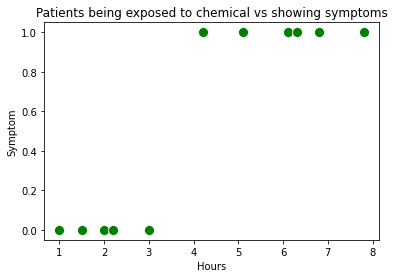

In [ ]:
sns.scatterplot(x='Hours',y='Symptom',color='green', data=df,s=100).set(title='Patients being exposed to chemical vs showing symptoms')
sns.set_style("whitegrid")

#### **Calculating $β_0$ and $β_1$ by hand**
---

In [ ]:
points=df.itertuples() 
n=len(df)
b1=(n*sum(df['Hours'][i] * df['Symptom'][i] for i in df.index) - sum(i for i in df['Hours'])*sum(i for i in df['Symptom'] ))/(n*sum(i**2 for i in df['Hours']) - sum(i for i in df['Hours'])**2)
b0=(sum(p.Symptom for p in points)/n)-b1*sum(p.Hours for p in points)

#### **Logistic Function**

\begin{equation}
y = \frac{1.0}{1.0 + e^{-(\beta_0 + \beta_1x)}}
\end{equation}

In [ ]:
import math
def predict_probability(x, b0, b1):
  p = 1.0 / (1.0 + math.exp(-(b0 + b1*x)))
  return p

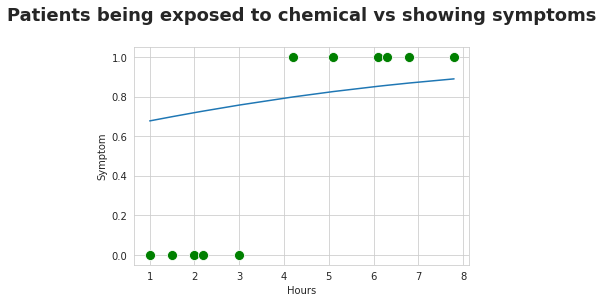

In [ ]:
ax=sns.scatterplot(x='Hours',y='Symptom',color='green', data=df,s=100)
ax.axes.set_title('Patients being exposed to chemical vs showing symptoms\n',weight='bold',fontsize=18)
y=[predict_probability(x,b0, b1) for x in df['Hours']]
ax=sns.lineplot(data=df, x='Hours',y=y)
plt.show()

#### **Using 'Sympy' to calculate results**

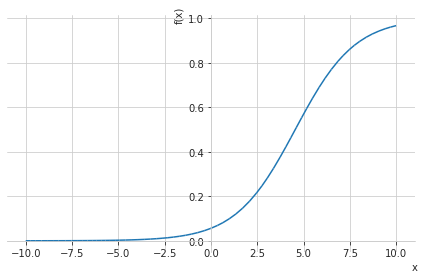

In [ ]:
from sympy import *
b0, b1, x = symbols('b0 b1 x')
p = 1.0 / (1.0 + exp(-(b0 + b1*x)))
p=p.subs(b0, -2.823)
p=p.subs(b1, 0.620) 
plot(p)

#### **Fitting Logistic Curve**
___

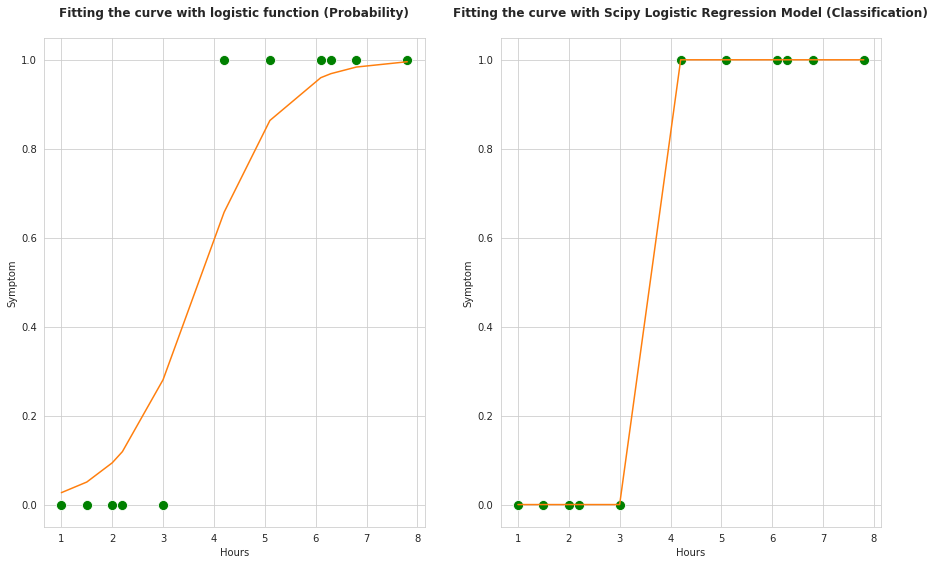

In [ ]:
from sklearn.linear_model import LogisticRegression
X = df.values[:,:-1]
Y = df.values[:,-1]
model = LogisticRegression(penalty='l2').fit(X,Y) #Ridge Regression Penalty

b1 = model.coef_.flatten() #coefficient
b0 = model.intercept_.flatten() #intercept
plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
ax=sns.scatterplot(x='Hours',y='Symptom',color='green', data=df,s=100)
ax.axes.set_title('Fitting the curve with logistic function (Probability)\n',weight='bold',fontsize=12)
y=[predict_probability(x,b0, b1) for x in df['Hours']]
ax=sns.lineplot(data=df, x='Hours',y=y,color='C1')
plt.subplot(1,2,2)
ax =sns.scatterplot(x='Hours',y='Symptom',color='green', data=df,s=100)
ax.axes.set_title('Fitting the curve with Scipy Logistic Regression Model (Classification)\n',weight='bold',fontsize=12)
ax=sns.lineplot(data=df, x='Hours',y=model.predict(X),color='C1')
plt.show()

#### **Using Maximum Likelihood and Gradient Descent**
___

Maximum Likelihood Estimation (MLE) maximizes the likelihood a given logistic curve would output the observed data. It is different than sum of squares, but we can still apply Gradient descent or stochastic gradient descent to solve it.

Essentially, the idea is to find the $β_0$ and $β_1$ coefficients that bring our logistic curve to those points as closely as possible, indicating that it most likely to have have produced those points.

We fetch each likelihood of the point below the curve would be subtracted from 1.0 to maximize false cases. 

In [ ]:
import math 
import pandas as pd
patient_data = pd.read_csv('https://bit.ly/33ebs2R',delimiter = ",").itertuples()
b0 = -3.17576395 
b1 = 0.69267212 

def logistic_function(x):
  p = 1.0 / (1.0 + math.exp(-(b0 + b1*x)))
  return p

joint_likelihood = 1.0 

for p in patient_data:
  if p.y == 1.0:
    joint_likelihood *= logistic_function(p.x)
  elif p.y == 0.0:
    joint_likelihood *= (1.0-logistic_function(p.x))

print(joint_likelihood)

4.7911180221699105e-05


### **Joint likelihood formula**:

\begin{equation}
\text{joint likelihood} = \prod_{i=1}^{n} \left(\frac{1.0}{1.0 + e^{-(β_0 + β_1x_i)}} \right)^{y_i} × \left(\frac{1.0}{1.0 + e^{-(β_0 + β_1x_i)}} \right)^{1.0 - y_i}\\
\end{equation}


In [ ]:
for p in patient_data:
  joint_likelihood *= logistic_function(p.x)**p.y * (1.0 - logistic_function(p.x))**(1.0 - p.y)
print(joint_likelihood) 

4.7911180221699105e-05


### **With Logarithmic addition:**
___
\begin{equation}
\text{joint likelihood} = \sum_{i=1}^{n} log\left(\left(\frac{1.0}{1.0 + e^{-(β_0 + β_1x_i)}} \right)^{y_i} × \left(\frac{1.0}{1.0 + e^{-(β_0 + β_1x_i)}} \right)^{1.0 - y_i}\right)
\end{equation}

In [ ]:
joint_likelihood=0.0
for p in patient_data:
  joint_likelihood+=math.log(logistic_function(p.x)**p.y * (1.0 - logistic_function(p.x))**(1.0 - p.y))
print(math.exp(joint_likelihood))

1.0


#### **Multivariable Logistic Regression**
___

\begin{equation}
y = \frac{1}{1+e^{-(β_0 + β_1x_1 + β_2x_2 +...+β_nx_n)}}
\end{equation}

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

employee_data = pd.read_csv("https://tinyurl.com/y6r7qjrp")
employee_data.columns= [(i.lower())for i in (employee_data.columns)]
# grab independent variable columns
inputs = employee_data.iloc[:, :-1]
# grab dependent "did_quit" variable column
output = employee_data.iloc[:, -1]
# build logistic regression
fit = LogisticRegression(penalty='none').fit(inputs, output)
# Print coefficients:
print("COEFFICIENTS: {0}".format(fit.coef_.flatten()))
print("INTERCEPT: {0}".format(fit.intercept_.flatten()))
# Interact and test with new employee data
def predict_employee_will_stay(sex, age, promotions, years_employed):
  prediction = fit.predict([[sex, age, promotions, years_employed]])
  probabilities = fit.predict_proba([[sex, age, promotions, years_employed]])
  print('pred:',prediction)
  if prediction == [[1]]:
    return "WILL LEAVE: {0}".format(probabilities)
  else:
    return "WILL STAY: {0}".format(probabilities)
# Test a prediction
while True:
  print('Press \'q\' to quit')
  items=['sex','age','promotions','year employed']
  inp=[]
  for i in items:
    n = input(f"input {i}: ")
    if n=='q':
      break
    else:
      inp.append(n)
  if len(inp)==4:
    n=' '.join(inp)
    (sex, age, promotions, years_employed) = n.split(" ")
    print(predict_employee_will_stay(int(sex), int(age), int(promotions),int(years_employed)))
    inp=[]
  else:
    break

COEFFICIENTS: [ 0.03213405  0.03682453 -2.50410028  0.9742266 ]
INTERCEPT: [-2.73485302]
Press 'q' to quit
input sex: 1
input age: 34
input promotions: 1
input year employed: 5
pred: [1]
WILL LEAVE: [[0.28570264 0.71429736]]
Press 'q' to quit
input sex: q


#### **Understanding the Log-Odds**
At this point, it is time to discuss the logistic regression and what it is mathematically made
of. This can be a bit dizzying so take your time here. If you get overwhelmed, you can
always revisit this section later.
Starting in the 1900s, it has always been of interest to mathematicians to take a linear
function and scale its output to fall between 0 and 1, and therefore be useful for predicting
probability. The log-odds, also called the logit function, lends itself to logistic regression for
this purpose.
Remember earlier I pointed out the exponent value β0 + β1x is a linear function? Look at
our logistic function again:
\begin{equation}
p = \frac{1.0}{1.0 + e^{-(β_0 + β_1x_i)}} 
\end{equation}
This linear function being raised to e is known as the log-odds function, which takes the
logarithm of the odds for the event of interest. Your response might be, “Wait, I don’t see
any log() or odds. I just see a linear function!” Bear with me, I will show the hidden
math.
As an example, let’s use our logistic regression from earlier where Β = -3.17576395 and Β
= 0.69267212. What is the probability of showing symptoms after six hours, where x = 6?
We already know how to do this: plug these values into our logistic function:

\begin{equation}
\text{odds} = \frac{p}{1-p}\\
\text{logit} = \text{log}\left(\frac{p}{1-p} \right) = β_0 + β_1x
\end{equation}

#### **R-Squared**
___

\begin{equation}
R^2 = \frac{\text{log likelihood - log likelihood fit}}{\text{log likelihood}}
\end{equation}
\begin{equation}
\text{log likelihood fit} = \sum_{i=1}^{n} (\text{log }(f(x_i))×y_i) +(\text{log }(1-f(x_i))×(1-y_i))
\end{equation}
\begin{equation}
\text{log likelihood} = \frac{\sum{y_i}}{n}×{y_i} + \left(1-\frac{\sum{y_i}}{n}\right)×(1-y_i)
\end{equation}

##### **Calculating Log likelihood fit:**

In [1]:
from math import log, exp
import pandas as pd
patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples()
b0 = -3.17576395
b1 = 0.69267212
def logistic_function(x):
  p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
  return p
# Sum the log-likelihoods
log_likelihood_fit = 0.0
for p in patient_data:
  if p.y == 1.0:
    log_likelihood_fit += log(logistic_function(p.x))
  elif p.y == 0.0:
    log_likelihood_fit += log(1.0 - logistic_function(p.x))
print(log_likelihood_fit) # -9.946161673231583

-9.946161673231583


In [5]:
# in a single line
log_likelihood_fit = sum(log(logistic_function(p.x)) * p.y +
log(1.0 - logistic_function(p.x)) * (1.0 - p.y)
for p in patient_data)
print(log_likelihood_fit)

-9.946161673231583


##### **Calculating Log likelihood:**

In [3]:
patient_data = list(pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples())
likelihood = sum(p.y for p in patient_data) / len(patient_data)
log_likelihood = 0.0
for p in patient_data:
  if p.y == 1.0:
    log_likelihood += log(likelihood)
  elif p.y == 0.0:
    log_likelihood += log(1.0 - likelihood)
print(log_likelihood)

-14.341070198709906


In [4]:
# in a single line
log_likelihood = sum(log(likelihood)*p.y + log(1.0 - likelihood)*(1.0 - p.y) \
for p in patient_data)
print(log_likelihood)

-14.341070198709906


##### **Calculating $R^2$:**

In [6]:
r2 = (log_likelihood - log_likelihood_fit) / log_likelihood
print(r2)

0.306456105756576


#### **P-Values**
Just like linear regression, we are not done just because we have an $R^2$. We need to
investigate how likely we would have seen this data by chance rather than because of an actual relationship. This means we need a p-value.

To do this, we will need to learn a new probability distribution called the chi-square distribution, annotated as $χ^2$ distribution. It is continuous and used in several areas of statistics, including this one!

We know, 

degree of freedom = $n-1$

\begin{equation}
\boxed{χ^2 = \text{2(log likelihood fit) - (log likelihood)}}
\end{equation}

Now we plug $χ^2$ value into $chi^2$ distribution to find p-value:

\begin{equation}
\boxed{\text{p-value = chi(2((log likelihood fit) − (log likelihood))}}
\end{equation}

In [8]:
import pandas as pd
from math import log, exp
from scipy.stats import chi2
patient_data = list(pd.read_csv('https://bit.ly/33ebs2R',
delimiter=",").itertuples())
# Declare fitted logistic regression
b0 = -3.17576395
b1 = 0.69267212
def logistic_function(x):
  p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
  return p
# calculate the log likelihood of the fit
log_likelihood_fit = sum(log(logistic_function(p.x)) * p.y + \
                         log(1.0 - logistic_function(p.x)) * (1.0 - p.y) for p in patient_data)
# calculate the log likelihood without fit
likelihood = sum(p.y for p in patient_data) / len(patient_data)
log_likelihood = sum(log(likelihood) * p.y + log(1.0 - likelihood) * (1.0 - p.y) \
                     for p in patient_data)
# calculate p-value
chi2_input = 2 * (log_likelihood_fit - log_likelihood)
p_value = chi2.pdf(chi2_input, 1) # 1 degree of freedom (n - 1)
print(p_value) # 0.0016604875618753787

0.0016604875618753787


So we have a p-value of 0.00166, and if our threshold for signifiance is .05, we say this data
is statistically significant and was not by random chance.

In [12]:
if p_value<0.05:
  print('Statistically significant: We have not seen this data by Random Chance')
else:
  print('Not Statistically significant: We have seen this data by Random Chance')

Statistically significant: We have not seen this data by Random Chance


##### **Chi Squared distribution**
___

### **The Chi-Square Statistic**
___
Suppose we conduct the following statistical experiment. We select a random sample of size $n$ from a normal population, having a standard deviation equal to $σ$. We find that the standard deviation in our sample is equal to $s$. Given these data, we can define a statistic, called chi-square, using the following equation:
\begin{equation}
χ^2 = \frac{(n-1) × s^2}{σ^2}
\end{equation}

The distribution of the chi-square statistic is called the chi-square distribution. The chi-square distribution is defined by the following probability density function:

\begin{equation}
Y = Y_0 × (χ^2)^{( \frac{v}{2} - 1 )} × e^{-\frac{\chi^2}{2}}
\end{equation}

where $Y_0$ is a constant that depends on the number of degrees of freedom, $χ^2$ is the chi-square statistic, $v = n - 1$ is the number of degrees of freedom, and $e$ is a constant equal to the base of the natural logarithm system (approximately 2.71828). $Y_0$ is defined, so that the area under the chi-square curve is equal to one.

In the figure below, the red curve shows the distribution of chi-square values computed from all possible samples of size 3, where degrees of freedom is $n - 1 = 3 - 1 = 2$. Similarly, the green curve shows the distribution for samples of size 5 (degrees of freedom equal to 4); and the blue curve, for samples of size 11 (degrees of freedom equal to 10).

<p align="center">
<img src="https://stattrek.com/img/chisquare.gif">
</p>

The chi-square distribution has the following properties:

* The mean of the distribution is equal to the number of degrees of freedom: $μ = v$
* The variance is equal to two times the number of degrees of freedom: $σ^2 = 2 × v$
* When the degrees of freedom are greater than or equal to 2, the maximum value for Y occurs when $\chi^2 = v - 2$.
* As the degrees of freedom increase, the chi-square curve approaches a normal distribution.

#### **Confusion Matrix**

In [88]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# Load the data
df = pd.read_csv('https://bit.ly/3cManTi', delimiter=",")
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]
# Extract output column (all rows, last column)\
Y = df.values[:, -1]
lr_model = LogisticRegression(solver='liblinear')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33,
random_state=10)
lr_model.fit(X_train, Y_train)
prediction = lr_model.predict(X_test)
"""
The confusion matrix evaluates accuracy within each category.
[[truepositives falsenegatives]
[falsepositives truenegatives]]
The diagonal represents correct predictions,
so we want those to be higher
"""
matrix = confusion_matrix(y_true=Y_test, y_pred=prediction)
print(matrix)

[[6 3]
 [4 5]]


#### **Receiver Operator Characteristics/Area Under Curve**
When we are evaluating different machine learning configurations, we may end up with
dozens, hundreds, or thousands of confusion matrices. These can be tedious to review, so we
can summarize all of them with a receiver operator characteristic (ROC) curve

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
results = cross_val_score(lr_model, X, Y, cv=kfold, scoring='roc_auc')

print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))
# AUC: 0.791 (0.051)

[0.86111111 0.74025974 0.77083333]


In [95]:
try:
  import scikitplot as skplt
except:
  %pip install scikit-plot
  import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = Y_test # ground truth labels
lr_probas = lr_model.predict_proba(X_test)# predicted probabilities generated by sklearn classifier
lr_probas = lr_probas[:, 1]
lr_auc=roc_auc_score(Y_test,lr_probas)
lr_fpr,lr_tpr,_ = roc_curve(y_true,lr_probas)
print(lr_auc)

0.7530864197530864


In [91]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)
prediction = dt_model.predict(X_test)
matrix = confusion_matrix(y_true=Y_test, y_pred=prediction)
print(matrix)

[[6 3]
 [5 4]]


In [99]:
dt_probas = dt_model.predict_proba(X_test)# predicted probabilities generated by sklearn classifier
dt_probas = dt_probas[:, 1]
dt_auc=roc_auc_score(Y_test,dt_probas)
dt_fpr,dt_tpr,_ = roc_curve(y_true,dt_probas)
print(dt_auc)

0.5555555555555556


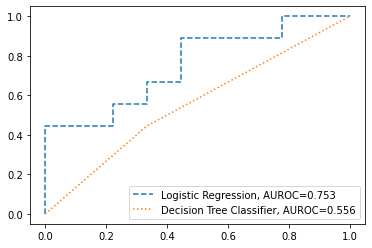

In [102]:
plt.plot(lr_fpr,lr_tpr,linestyle='--',label='Logistic Regression, AUROC=%0.3f'%lr_auc)
plt.plot(dt_fpr,dt_tpr,linestyle=':',label='Decision Tree Classifier, AUROC=%0.3f'%dt_auc)
plt.legend()
plt.show()

We can also compare different machine learning models by creating separate ROC curves for each.

* The greater the area of a model the better the model.

In the above AUROC Curve Decision Tree Classifier has smaller area than the logistic regression model area. So, the logistic regression is performing better on this case.

#### **Class Imbalance**
There is one last thing to cover before we close this chapter. As we saw earlier when
discussing confusion matrices, class imbalance, which happens when data is not equally
represented across every outcome class, is a problem in machine learning. Unfortunately,
many problems of interest are imbalanced, such as disease prediction, security breaches,
fraud detection, and so on. Class imbalance is still an open problem with no great solution.
However, there are a few techniques you can try.
First, you can do obvious things like collect more data or try different models as well as use
confusion matrices and ROC/AUC curves. All of this will help track poor predictions and
proactively catch errors.
Another common technique is to duplicate samples in the minority class until it is equally
represented in the dataset. You can do this in scikit-learn as shown in Example 6-19 when
doing your train-test splits. Pass the ```stratify``` option with the column containing the class
values, and it will attempt to equally represent the data of each class.

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33, stratify=Y,random_state=10)